# A Simple Neural Network with Numpy

This is the neural network to build, three layers to go with one hidden layer, and without biases
![](./img/0.png)

## Import some libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Make some data to train

In [2]:
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])

y = np.array([[0],
            [1],
            [1],
            [0]])

## Set the nodes

In [3]:
input_nodes = 3
hidden_nodes = 5
output_nodes = 1

# the learning rate
lr = 0.1

# the feature size
n_records = X.shape[0]

## Initialize weights

In [4]:
weights_0_1 = np.random.normal(0.0, input_nodes**-0.5, (input_nodes, hidden_nodes))
weights_1_2 = np.random.normal(0.0, hidden_nodes**-0.5, (hidden_nodes, output_nodes))

## Define activation function

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Here's a single neuron, a computational unit takes some inputs and then make an output. I'll use the sigmoid function to activate the output of the hidden neuron. The output neuron uses the linear function $f(x) = x$    
![](./img/1.png)    
The forward pass is as shown below, and matrix multiply is used to simplify the calculation
![](./img/2.png)    
The backpropagation algorithm, this is used to find the proper weights
![](./img/3.png)

## Train the network
Next step is to train the network, adjusting the weights to make the output closer to the label

In [6]:
# store the error
error_list = []

for i in range(60000):
    # Forward pass
    hidden_inputs = np.dot( X, weights_0_1 )
    hidden_outputs = sigmoid(hidden_inputs)

    final_inputs = np.dot( hidden_outputs, weights_1_2 )
    final_outputs = final_inputs
    
    # Backpropagation Algorithm
    delta_output_layer = -(y - final_outputs) * final_outputs * (1 - final_outputs)
    delta_hidden_layer = np.dot(delta_output_layer, weights_1_2.T) * hidden_outputs * (1 - hidden_outputs)

    delta_weights_1_2 = np.dot(hidden_outputs.T, delta_output_layer)
    delta_weights_0_1 = np.dot(X.T, delta_hidden_layer)
    
    # Update the weights
    weights_0_1 -= lr / n_records * delta_weights_0_1
    weights_1_2 -= lr / n_records * delta_weights_1_2
    
    # calculate the error
    error = np.mean(np.abs(np.dot(sigmoid(np.dot( X, weights_0_1 )), weights_1_2) - y))
    error_list.append(error)
    if i %5000 == 0:
        print(error)

0.501031254273
0.49838677961
0.488997874654
0.33398954168
0.084926167562
0.0390650405474
0.0246155827274
0.0178186442709
0.0139153146716
0.0113952471853
0.00963859122863
0.00834614169873


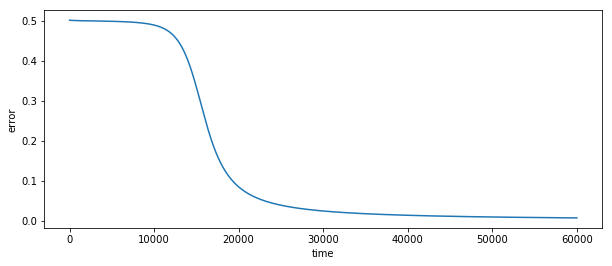

In [7]:
plt.figure(figsize=(10,4))
plt.plot(error_list)  
plt.xlabel("time")  
plt.ylabel("error")   
plt.show()

# Put all the things to a class and make some _real_ prediction 

In [8]:
class SimpleNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.random.normal(0.0, self.input_nodes**-0.5, (self.input_nodes, self.hidden_nodes))
        self.weights_1_2 = np.random.normal(0.0, self.hidden_nodes**-0.5, (self.hidden_nodes, self.output_nodes))
        
        self.lr = learning_rate
        
        self.activation_function = lambda x : 1/(1 + np.exp(-x))
        
    def train(self, features, targets):
        n_records = features.shape[0]

        delta_weights_0_1 = np.zeros(self.weights_0_1.shape)
        delta_weights_1_2 = np.zeros(self.weights_1_2.shape)
        
        for X, y in zip(features, targets):
            X = X[None, :]

            # Forward pass
            hidden_inputs = np.dot( X, self.weights_0_1 )
            hidden_outputs = self.activation_function(hidden_inputs)

            final_inputs = np.dot( hidden_outputs, self.weights_1_2 )
            final_outputs = final_inputs

            # Backpropagation Algorithm
            delta_output_layer = -(y - final_outputs) * final_outputs * (1 - final_outputs)
            delta_hidden_layer = np.dot(delta_output_layer, self.weights_1_2.T) * hidden_outputs * (1 - hidden_outputs)

            delta_weights_1_2 += np.dot(hidden_outputs.T, delta_output_layer)
            delta_weights_0_1 += np.dot(X.T, delta_hidden_layer)

        # Update the weights
        self.weights_0_1 -= self.lr / n_records * delta_weights_0_1
        self.weights_1_2 -= self.lr / n_records * delta_weights_1_2

    def run(self, features):
        hidden_inputs = np.dot(features, self.weights_0_1)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(hidden_outputs, self.weights_1_2)
        final_outputs = final_inputs
        
        return final_outputs

# Load the bicycle dataset
The dataset is from one project of Udacity

In [9]:
rides = pd.read_csv('dataset/hour.csv')
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Take a look at first 5 days data

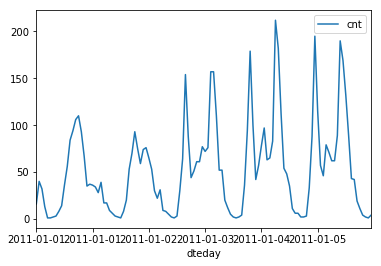

In [10]:
rides[:24*5].plot(x='dteday', y='cnt')

## Prepare the data
modify some features to binary use Pandas `get_dummies()`   
drop some features for I won't use them this time

In [11]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


## Scale the data for better training

In [12]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later for prediction
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

## Split the data to training, validation and testing

In [13]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

# Use the Simple Neural Network to predict

In [24]:
import sys

# the hyperparameters
iterations = 1000
learning_rate = 0.1
hidden_nodes = 5
output_nodes = 1

N_i = train_features.shape[1]
network = SimpleNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}

def MSE(y, Y):
    return np.mean((y-Y)**2)

for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
    
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    if ii%100 == 0:
        sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                         + "% ... Training loss: " + str(train_loss)[:5] \
                         + " ... Validation loss: " + str(val_loss)[:5])
        sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 90.0% ... Training loss: 0.812 ... Validation loss: 1.108

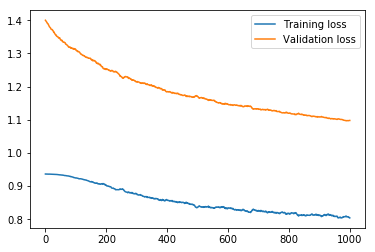

In [25]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

## Make the prediction

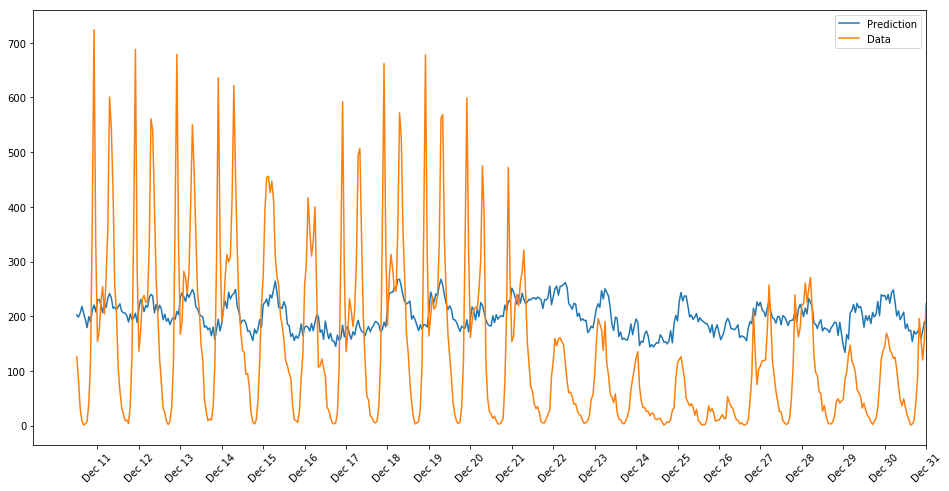

In [26]:
fig, ax = plt.subplots(figsize=(16,8))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

For the simple neural network structure, the prediction seems not so bad...